In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
import numpy as np
import matplotlib.pyplot as plt

2026-01-15 08:06:27.735850: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-15 08:06:27.784846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-15 08:06:29.205758: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Data Preparation** 

In [2]:
data = pd.read_csv(r"train.csv")

display(data.head())
display(data.shape)

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

(1000, 12)

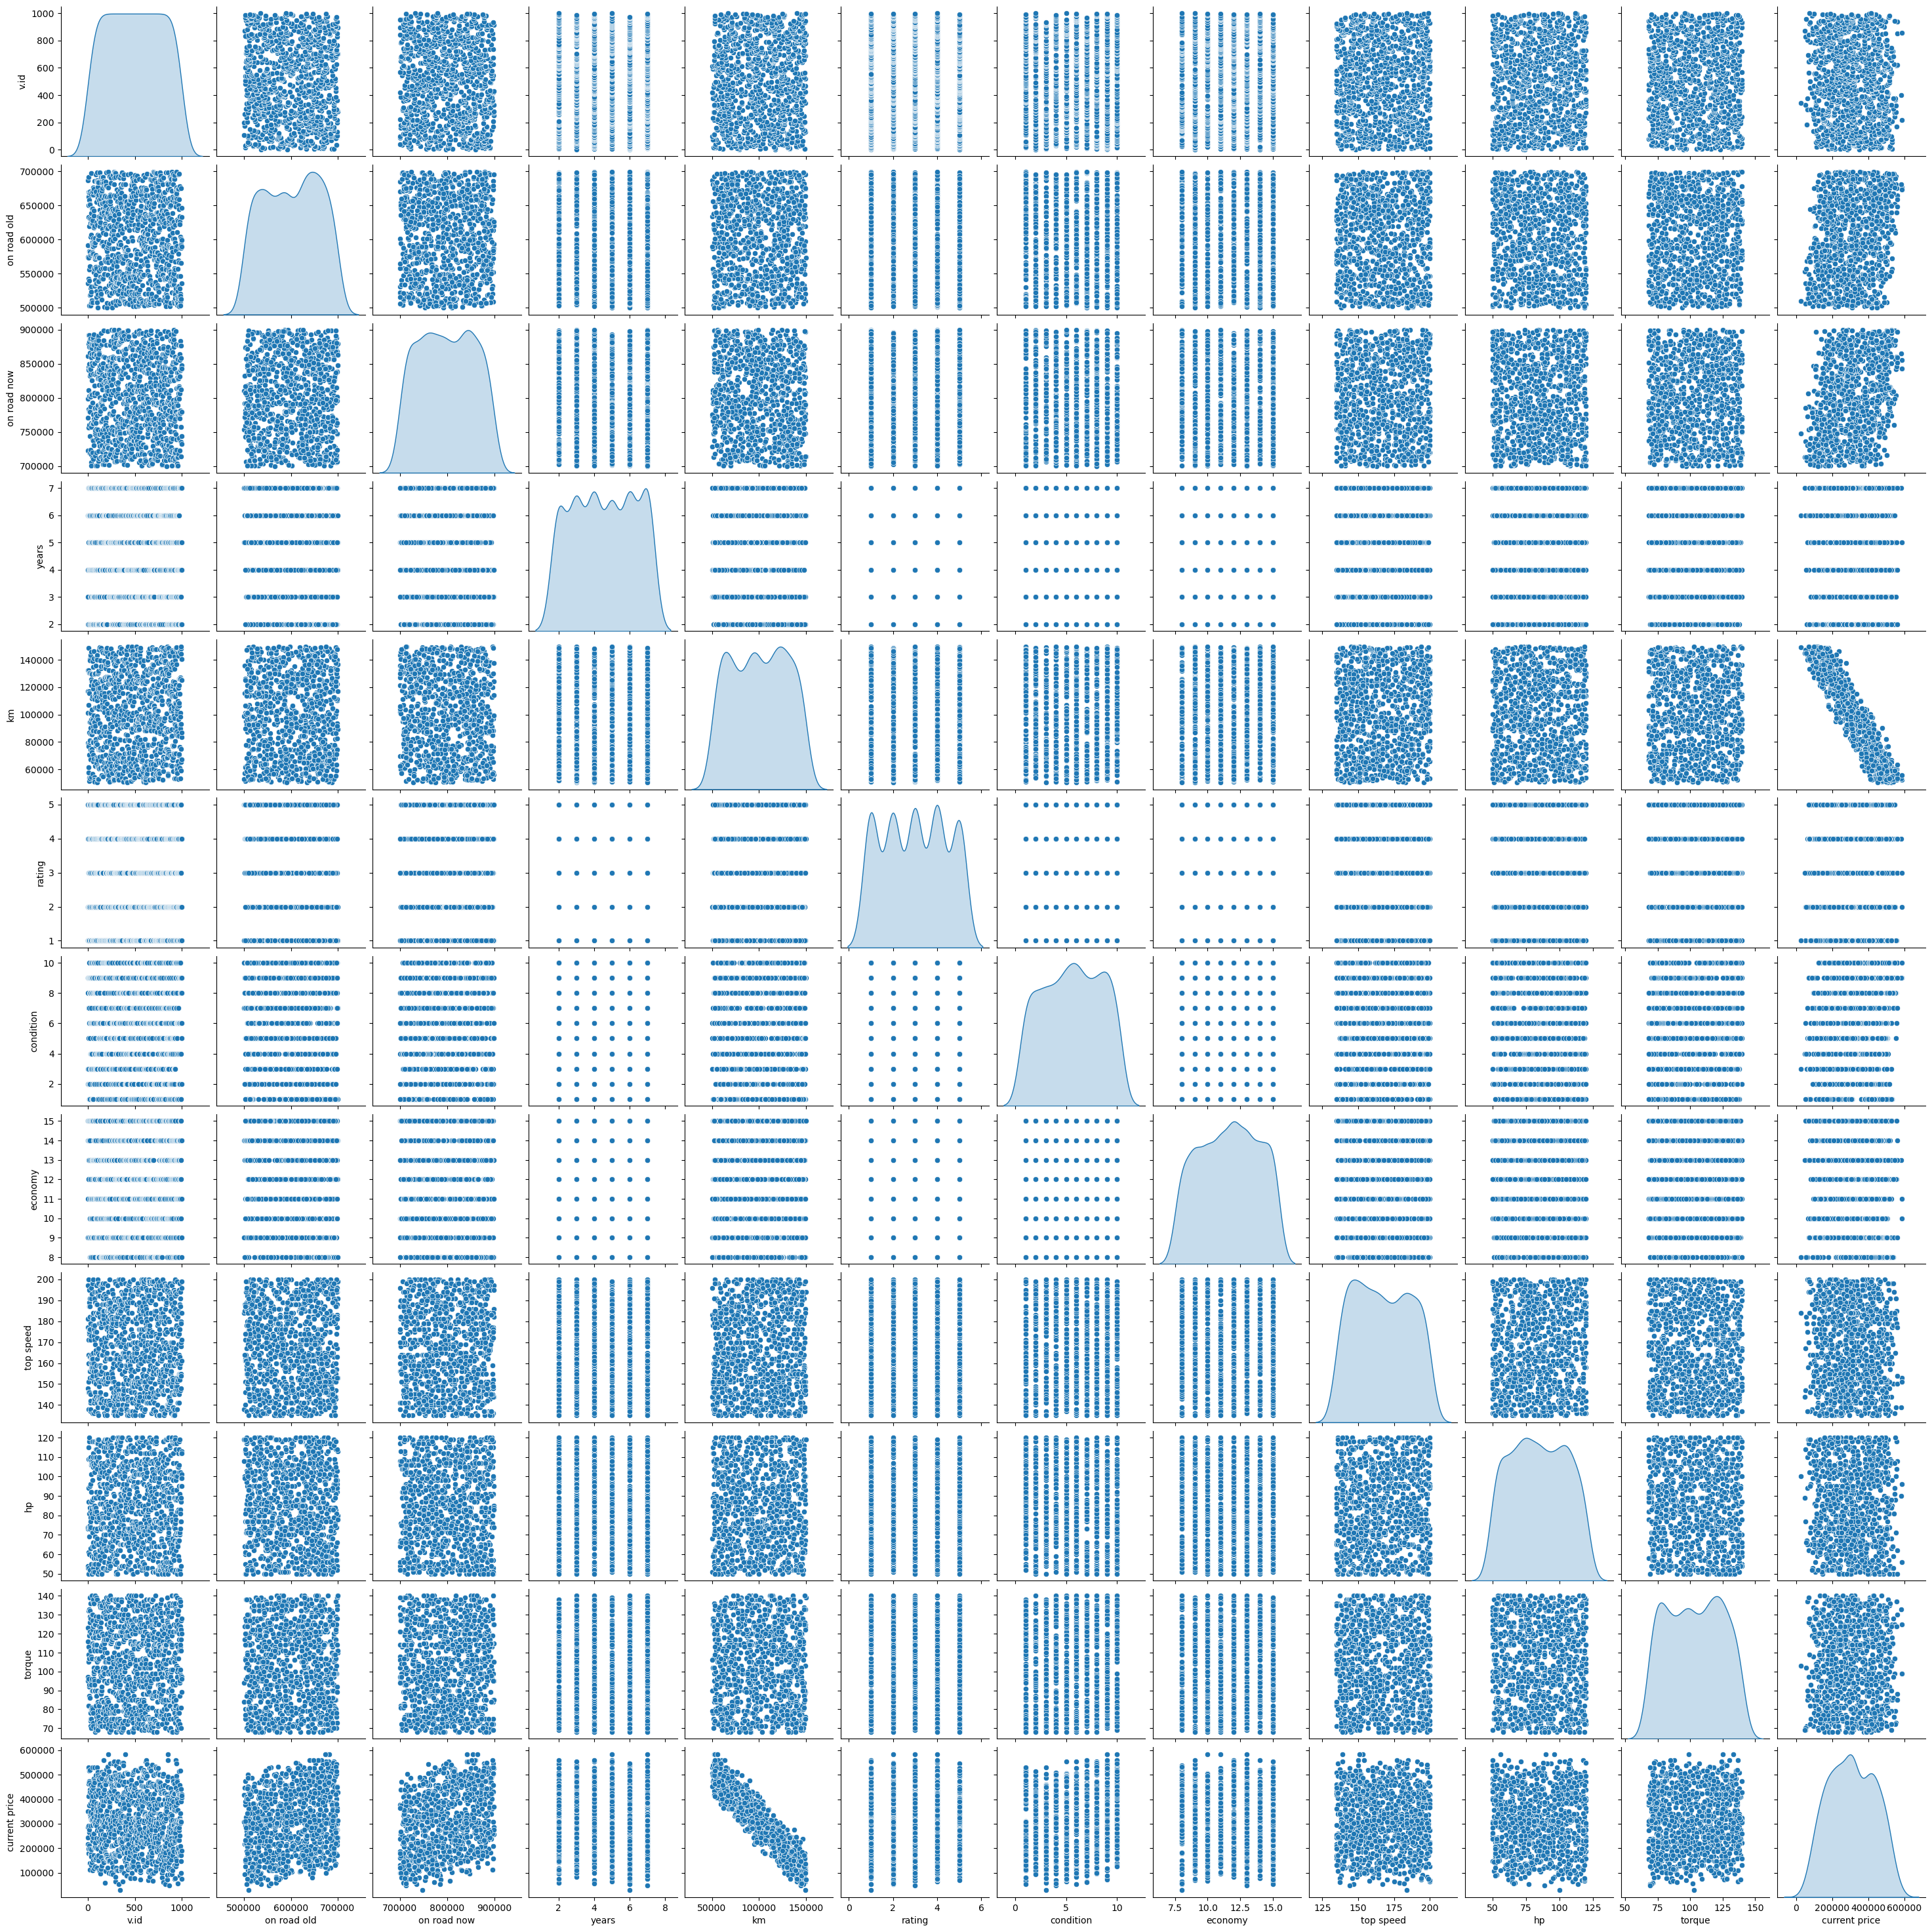

In [3]:
sns.pairplot(data[data.columns], diag_kind='kde')

In [4]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
display(tensor_data)

I0000 00:00:1768432001.010772  238119 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5560 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], shape=(1000, 12), dtype=float32)>

In [5]:
tensor_data = tf.random.shuffle(tensor_data)
display(tensor_data[:5])

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.700000e+01, 5.565980e+05, 8.499020e+05, 4.000000e+00,
        1.305140e+05, 3.000000e+00, 9.000000e+00, 1.500000e+01,
        1.890000e+02, 1.200000e+02, 1.330000e+02, 2.106615e+05],
       [7.300000e+01, 5.324100e+05, 8.038160e+05, 3.000000e+00,
        5.215600e+04, 4.000000e+00, 7.000000e+00, 1.300000e+01,
        1.430000e+02, 1.180000e+02, 9.000000e+01, 4.685430e+05],
       [2.400000e+01, 5.191440e+05, 8.860240e+05, 6.000000e+00,
        1.396850e+05, 2.000000e+00, 2.000000e+00, 1.100000e+01,
        1.630000e+02, 5.200000e+01, 1.210000e+02, 1.402165e+05],
       [1.490000e+02, 6.639850e+05, 7.481070e+05, 3.000000e+00,
        1.465400e+05, 3.000000e+00, 7.000000e+00, 9.000000e+00,
        1.640000e+02, 6.300000e+01, 9.200000e+01, 1.284895e+05],
       [3.550000e+02, 5.753980e+05, 8.887010e+05, 7.000000e+00,
        1.032220e+05, 2.000000e+00, 1.000000e+00, 9.000000e+00,
        1.980000e+02, 7.800000e+01, 6.800000e+01, 3

In [6]:
X = tensor_data[:, 3:-1]
display(X.shape)

TensorShape([1000, 8])

In [7]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
display(y.shape)

TensorShape([1000, 1])

In [8]:
normalizer = Normalization(axis=-1, mean=5, variance=4)
x_normalized = tf.constant([[3,4,5,6,7],[4,5,6,7,8],])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [9]:
normalizer = Normalization() # automatically as col
x_normalized = tf.constant([[3,4,5,6,7],[4,5,6,7,8],])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [10]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32650068,  1.0378807 ,  0.00855871,  1.2072107 ,  1.5138373 ,
         1.1467037 ,  1.7289003 ,  1.4052045 ],
       [-0.90849847, -1.6515179 ,  0.7217797 ,  0.4987537 ,  0.6167485 ,
        -1.2393453 ,  1.6313711 , -0.6377271 ],
       [ 0.83749485,  1.3526472 , -0.70466226, -1.2723887 , -0.28034025,
        -0.20193264, -1.5870926 ,  0.8350841 ],
       [-0.90849847,  1.5879241 ,  0.00855871,  0.4987537 , -1.177429  ,
        -0.15006201, -1.0506821 , -0.542707  ],
       [ 1.4194926 ,  0.10116633, -0.70466226, -1.6266172 , -1.177429  ,
         1.6135395 , -0.31921297, -1.6829479 ]], dtype=float32)>

In [11]:
# model = tf.keras.Sequential([
#     normalizer,
#     Dense(1,)
# ])
# model.summary()

In [12]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (1000, 8)
y.shape: (1000, 1)


In [13]:
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15
DATASET_SIZE = len(X)

In [14]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train= y[:int(DATASET_SIZE*TRAIN_RATIO)]
display(X_train.shape)
display(y_train.shape)

TensorShape([700, 8])

TensorShape([700, 1])

In [15]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val= y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
display(X_val.shape)
display(y_val.shape)
X_test = X[(int(DATASET_SIZE*TRAIN_RATIO) + int(DATASET_SIZE*VAL_RATIO)):]
y_test= y[(int(DATASET_SIZE*TRAIN_RATIO) + int(DATASET_SIZE*VAL_RATIO)):]
display(X_test.shape)
display(y_test.shape)

TensorShape([150, 8])

TensorShape([150, 1])

TensorShape([150, 8])

TensorShape([150, 1])

In [26]:
# tf dataset api
buffer_size = len(X_train)   # 전체를 잘 섞음(메모리 여유 있을 때)

train_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(buffer_size=buffer_size, reshuffle_each_iteration=True)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

val_dataset = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

In [28]:
# model = tf.keras.Sequential()
# model.add(InputLayer(input_shape=(8,)))
# model.add(normalizer)
# model.add(Dense(1))
# model.compile(optimizer="adam", loss=MeanAbsoluteError())
# model.summary()
# model.build()

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    normalizer,
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-2),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[RootMeanSquaredError()]
)

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

# hisotry = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

hisotry = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100
)
model.summary()

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 305639.8750 - root_mean_squared_error: 330592.7188 - val_loss: 322788.0000 - val_root_mean_squared_error: 345913.1875
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 276356.9688 - root_mean_squared_error: 303588.1875 - val_loss: 232635.0469 - val_root_mean_squared_error: 262444.0938
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116904.0078 - root_mean_squared_error: 151444.7969 - val_loss: 62671.4805 - val_root_mean_squared_error: 73586.0391
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43427.0781 - root_mean_squared_error: 54647.3789 - val_loss: 44961.0195 - val_root_mean_squared_error: 56245.6367
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40305.5586 - root_mean_squared_error: 49923.9922 - val_loss: 46208.5547 - val_root_mean_squared_error: 56215.3359
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38198.4102 - root_mean_squared_error: 47865.1953 - val_loss: 4292

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,934 (402.09 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 68,612 (268.02 KB)

In [30]:
# display(','.join())
display(','.join(hisotry.history.keys()))
len(hisotry.history)

'loss,root_mean_squared_error,val_loss,val_root_mean_squared_error'

4

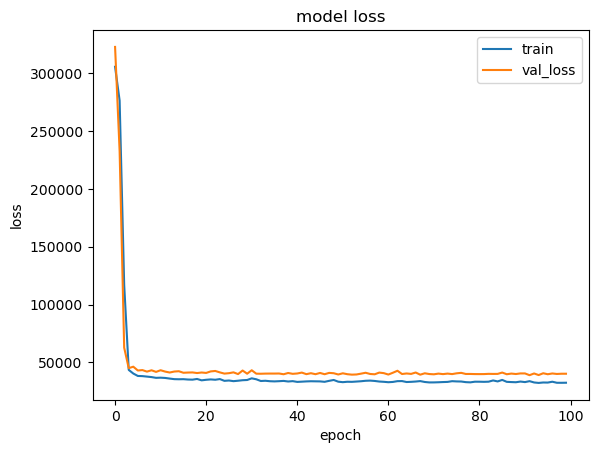

In [31]:
plt.plot(hisotry.history['loss'])
plt.plot(hisotry.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

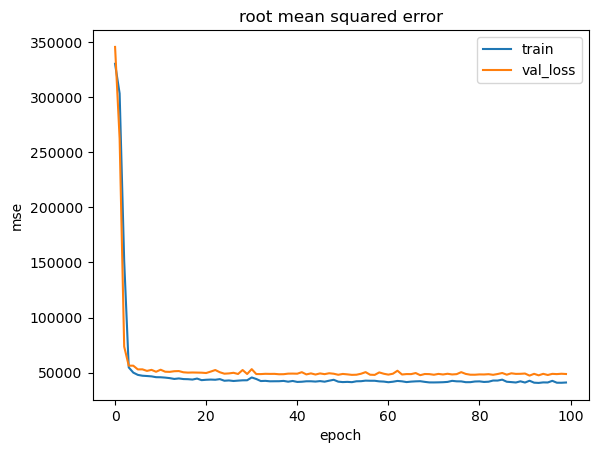

In [32]:
plt.plot(hisotry.history['root_mean_squared_error'])
plt.plot(hisotry.history['val_root_mean_squared_error'])

plt.title('root_mean_squared_error'.replace('_',' '))
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [33]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32050.1875 - root_mean_squared_error: 40096.1680 


[32050.1875, 40096.16796875]

In [ ]:
# X_test.shape
# # predict on 1 row
# y0_pred = model.predict(tf.expand_dims(X_test[0], axis=0) )
# y0_true = y_test[0]
# display(y0_pred)
# display(y0_true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[254341.36]], dtype=float32)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([304923.5], dtype=float32)>

In [35]:
y_pred = model.predict(X_test)
display(y_pred.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(150, 1)

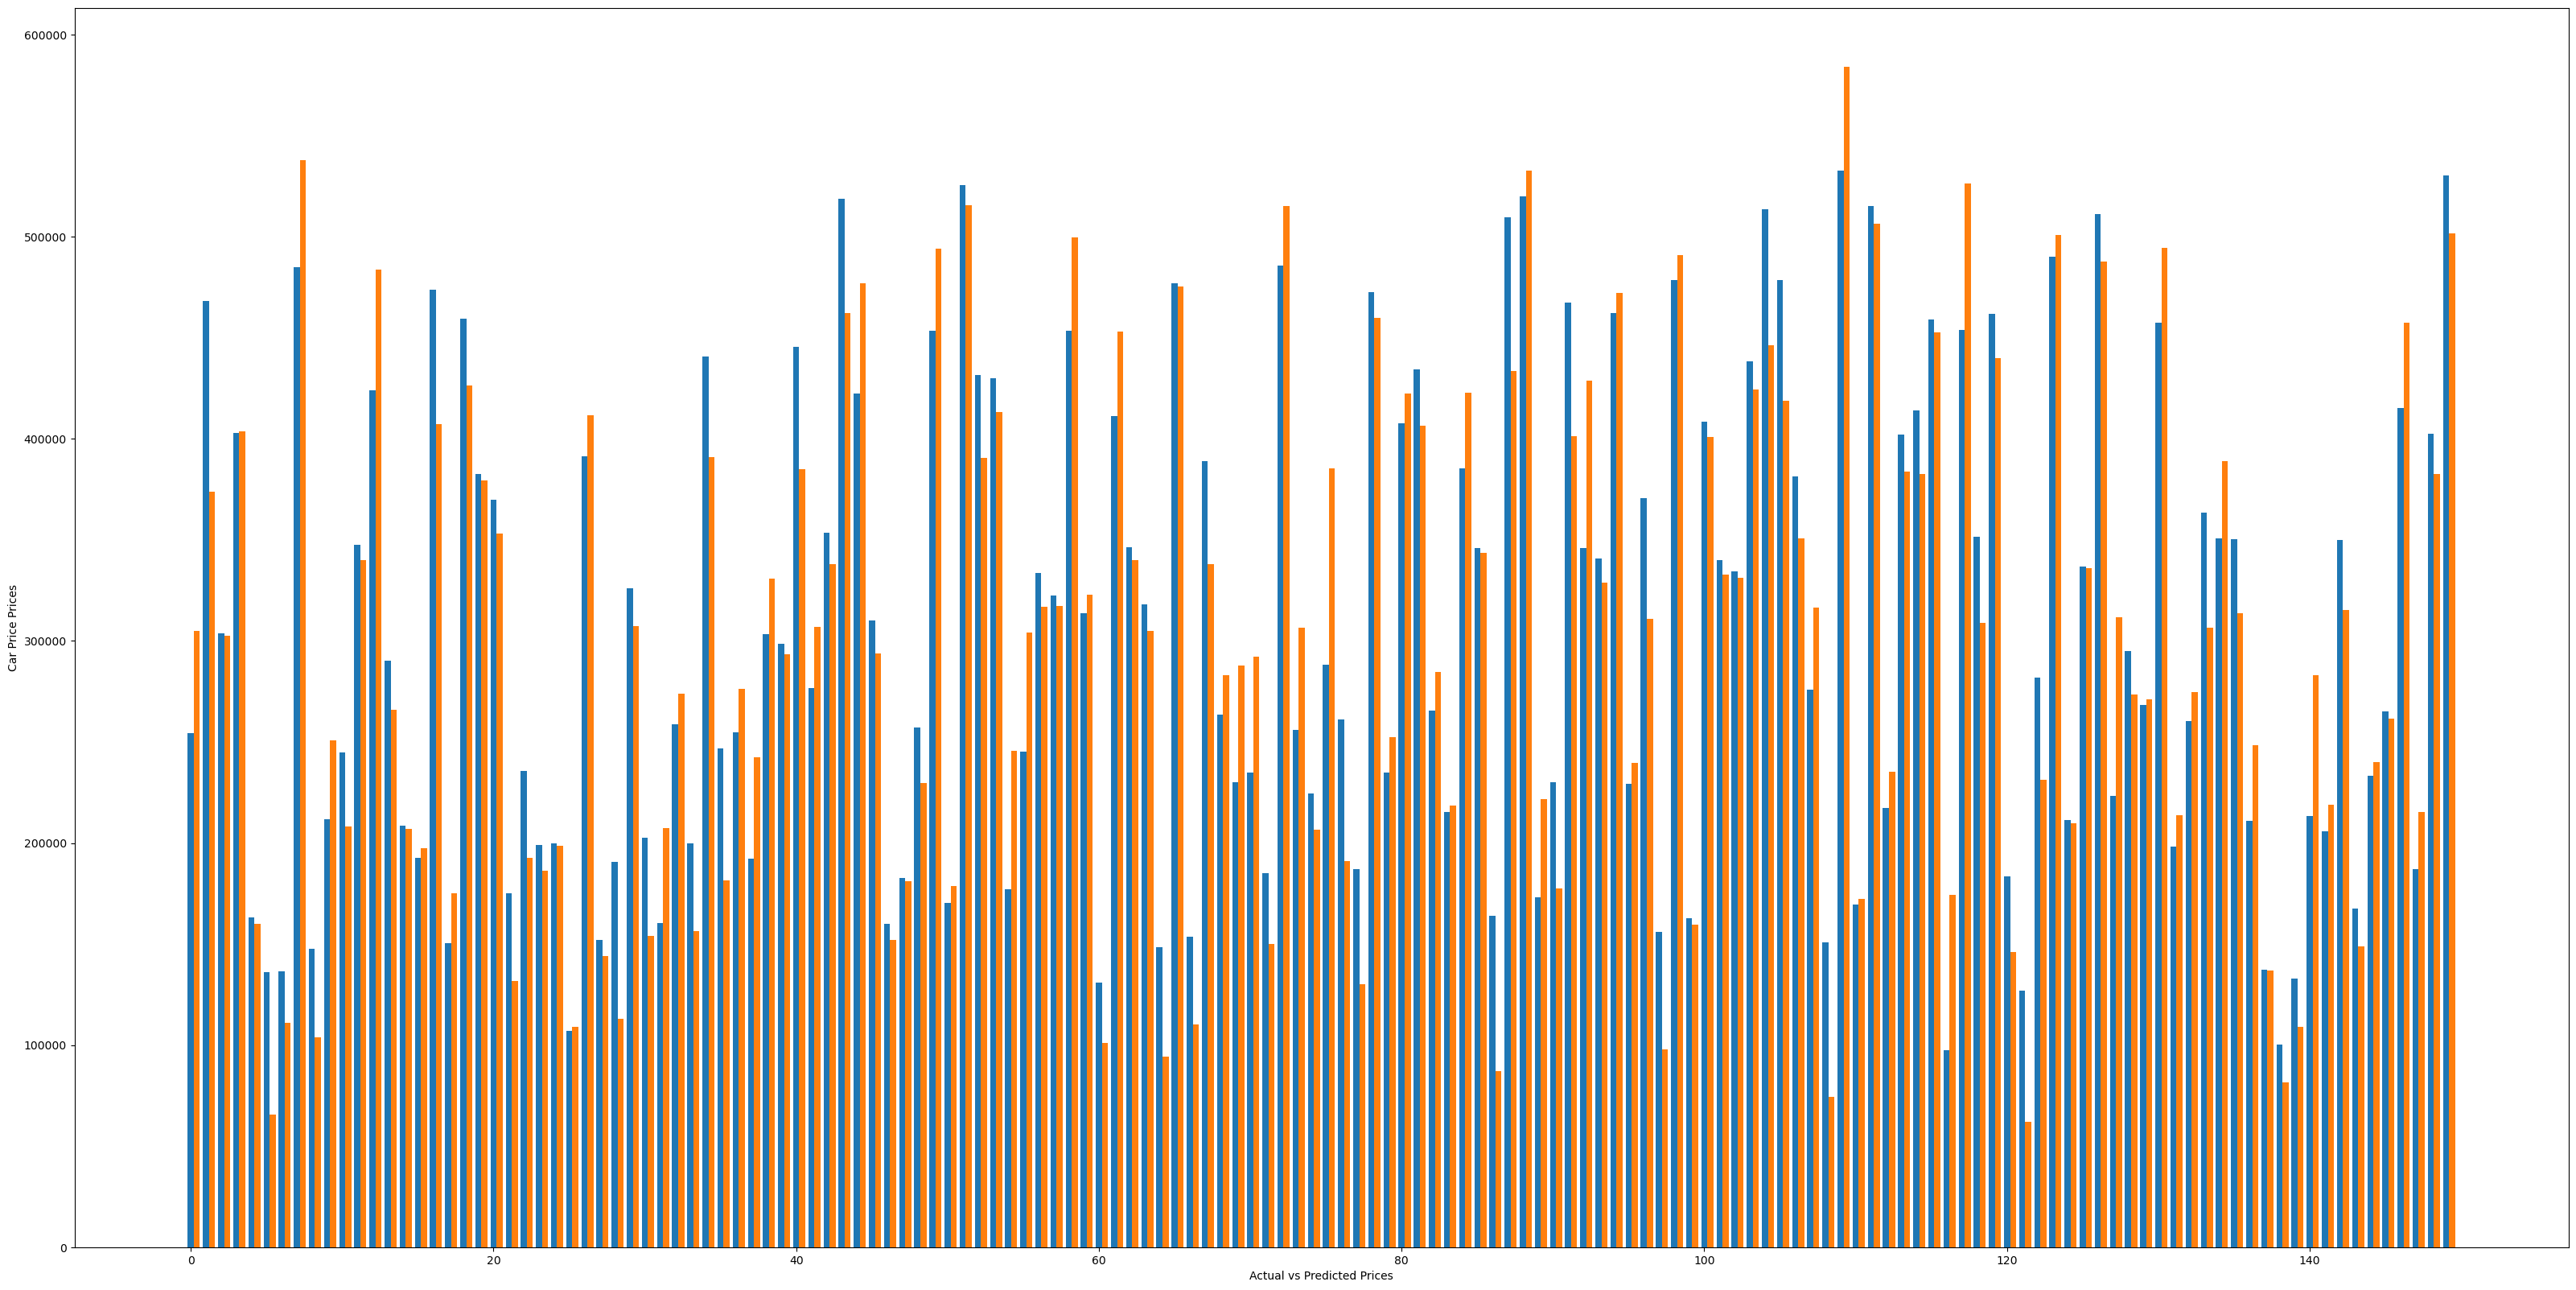

In [36]:
idx = np.arange(TEST_RATIO * DATASET_SIZE)
plt.figure(figsize=(40, 20))
width = 0.4
plt.bar(idx, y_pred[:,0], width, label='Predicated Car Price')
plt.bar(idx + width, y_test[:,0], width, label='Actual Car Price' )

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.savefig('model_epoch_100_dataset.png')
plt.show()